In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

In [5]:
data=pd.read_csv("indiancrop_dataset.csv")

In [6]:
data.head()

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,STATE,CROP_PRICE,CROP
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Andaman and Nicobar,7000,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Andaman and Nicobar,5000,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Andaman and Nicobar,7000,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Andaman and Nicobar,7000,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Andaman and Nicobar,120000,Rice


In [7]:
# Encode categorical variables (State and Crop)
le_state = LabelEncoder()
le_crop = LabelEncoder()
data['STATE'] = le_state.fit_transform(data['STATE'])
data['CROP'] = le_crop.fit_transform(data['CROP'])

In [8]:
data

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,STATE,CROP_PRICE,CROP
0,90,42,43,20.879744,82.002744,6.502985,202.935536,0,7000,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,0,5000,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,0,7000,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,0,7000,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,0,120000,20
...,...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,25,1000,5
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,25,800,5
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,25,560,5
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,25,1500,5


In [9]:
X=data.drop(['CROP_PRICE','CROP'],axis=1)
y=data['CROP']


In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
model=RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [13]:
y_pred = model.predict(X_test)
y_pred

array([15, 21, 17, 17,  0, 12,  0, 13, 14, 10,  2,  4, 19,  8,  4, 19,  0,
       11, 17, 15,  5, 17, 16, 17,  3,  8, 14, 16, 18, 20, 19, 13,  8, 10,
        8,  2,  8,  3,  3,  9, 17, 12,  2, 11, 14, 11, 18,  4, 15, 11,  2,
        5,  7, 14,  5,  9,  6,  0,  1,  2, 21,  4, 10, 16, 17, 18, 16, 20,
       15, 18, 15,  4,  8,  1,  2, 17,  1,  6, 21, 16,  5,  3, 20, 13, 16,
       12,  5, 13,  2, 19, 11, 13,  6, 17, 18, 13,  9,  5,  2, 10,  4, 20,
       16, 15, 21,  9, 21,  1, 18, 13,  1,  8,  6, 19, 18,  3, 11,  4, 19,
       20, 18,  7,  2,  4,  3,  2,  4, 11,  1, 13,  1,  9, 19,  3,  4, 16,
       18,  1,  1,  0,  9, 15, 14, 13,  4, 11,  0,  4,  9, 13, 14, 10, 21,
       14, 18, 18, 18,  9, 11,  8,  3,  0, 16,  6, 20,  4,  7, 10, 21,  7,
        7,  2, 19,  3,  4, 11, 10,  7, 21,  8,  5,  5,  9,  8, 13,  9,  1,
        9,  4, 17, 17, 14, 12, 19, 21,  9, 11,  0,  2,  3,  7,  7,  1,  6,
       20, 19, 14,  1,  8, 14, 11,  3,  3,  3,  0, 20,  9, 17,  5,  2,  9,
       12, 12,  4, 17,  0

In [14]:

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       1.00      1.00      1.00        23
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      1.00      1.00        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.0

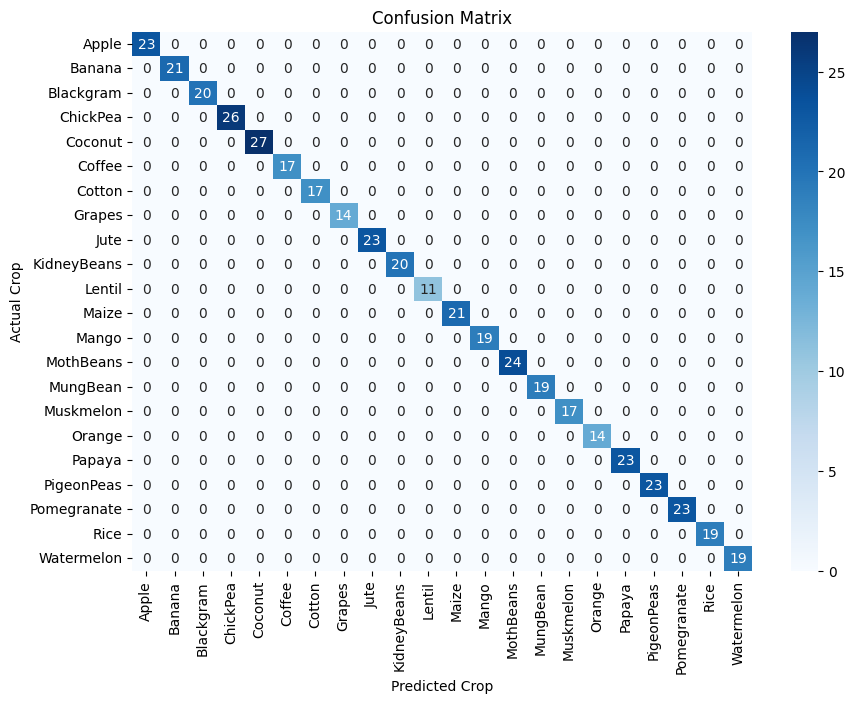

In [15]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualization
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le_crop.classes_, yticklabels=le_crop.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Crop')
plt.ylabel('Actual Crop')
plt.show()


In [16]:
# Assuming the model and scalers are already trained as in the previous example

# Step 1: Take custom input from the user
custom_input = {
    'N_SOIL': float(input("Enter Nitrogen content (N_SOIL): ")),
    'P_SOIL': float(input("Enter Phosphorus content (P_SOIL): ")),
    'K_SOIL': float(input("Enter Potassium content (K_SOIL): ")),
    'TEMPERATURE': float(input("Enter Temperature: ")),
    'HUMIDITY': float(input("Enter Humidity: ")),
    'ph': float(input("Enter pH value: ")),
    'RAINFALL': float(input("Enter Rainfall: ")),
    'STATE': input("Enter State: ")
}


# Step 2: Preprocess the custom input
# Convert the state to its corresponding label
custom_input['STATE'] = le_state.transform([custom_input['STATE']])[0]

# Convert the input dictionary to a DataFrame
custom_input_df = pd.DataFrame([custom_input])

# Scale the features
custom_input_scaled = scaler.transform(custom_input_df)

# Step 3: Predict the crop
predicted_crop_encoded = model.predict(custom_input_scaled)
predicted_crop = le_crop.inverse_transform(predicted_crop_encoded)

# Step 4: Display the result
print(f"The recommended crop for the given conditions is: {predicted_crop[0]}")


Enter Nitrogen content (N_SOIL): 69
Enter Phosphorus content (P_SOIL): 37
Enter Potassium content (K_SOIL): 42
Enter Temperature: 23
Enter Humidity: 83
Enter pH value: 7
Enter Rainfall: 251
Enter State: Andaman and Nicobar
The recommended crop for the given conditions is: Rice
